In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error as MAE

df_data = pd.read_csv("RyoriCO2.csv")
df_data


,年,月,二酸化炭素濃度の月平均値(綾里)[ppm]
0,1987,1,353.3
1,1987,2,354.1
2,1987,3,354.9
3,1987,4,356.6
4,1987,5,354.8
...,...,...,...
427,2022,8,410.1
428,2022,9,413.9
429,2022,10,419.6
430,2022,11,424.3


In [2]:
print(df_data[df_data.columns[0]].unique())
print(len(df_data[df_data.columns[0]].unique()))
print(len(df_data))

[1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022]
36
432


In [3]:
col2=df_data[df_data.columns[2]]
col2

0      353.3
1      354.1
2      354.9
3      356.6
4      354.8
       ...  
427    410.1
428    413.9
429    419.6
430    424.3
431    424.8
Name: 二酸化炭素濃度の月平均値(綾里)[ppm], Length: 432, dtype: object

In [5]:
raw_co2=pd.to_numeric(col2, errors='coerce')
df_data[raw_co2.isna()]

,年,月,二酸化炭素濃度の月平均値(綾里)[ppm]
291,2011,4,--


In [6]:
pp_co2=raw_co2.interpolate()
df_data[pp_co2.isna()]

,年,月,二酸化炭素濃度の月平均値(綾里)[ppm]


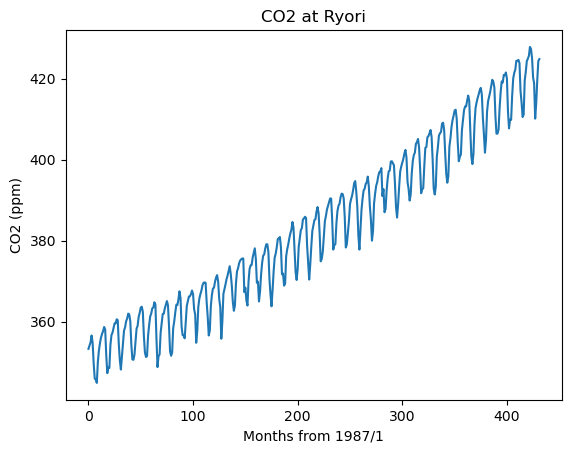

In [7]:
plt.title('CO2 at Ryori')
plt.xlabel('Months from 1987/1')
plt.ylabel('CO2 (ppm)')
plt.plot(pp_co2)
plt.show()

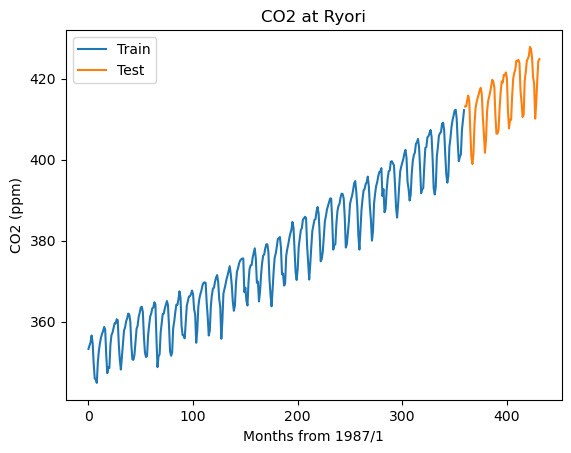

In [8]:
train_data = pp_co2[0:12*30]
test_data = pp_co2[len(train_data):]
plt.title('CO2 at Ryori')
plt.xlabel('Months from 1987/1')
plt.ylabel('CO2 (ppm)')
plt.plot(train_data,label = "Train")
plt.plot(test_data,label = "Test")
plt.legend()
plt.show()

In [10]:
AR_model = AutoReg(train_data, lags=12).fit()
fit = AR_model.fittedvalues
MAE_train = MAE(train_data[fit.index], fit)
pred = AR_model.forecast(len(test_data))
MAE_test = MAE(test_data, pred)
print(MAE_train,MAE_test)

0.9234777115948593 1.414063787087495


In [11]:
AR_model=AutoReg(train_data, lags=12).fit()
fit=AR_model.fittedvalues
pred=AR_model.forecast(len(test_data))

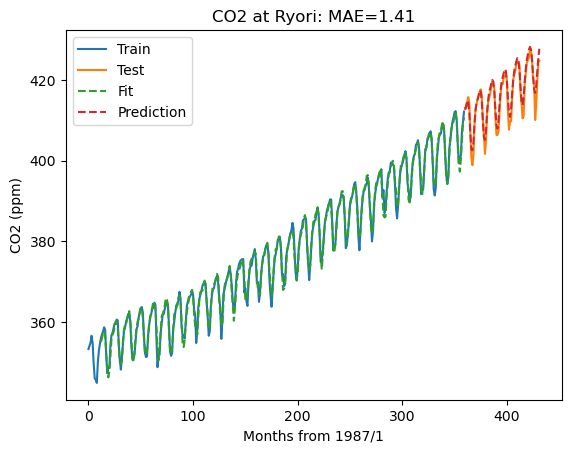

In [12]:
plt.title(f'CO2 at Ryori: MAE={MAE_test:.2f}')
plt.xlabel('Months from 1987/1')
plt.ylabel('CO2 (ppm)')
plt.plot(train_data,label = "Train")
plt.plot(test_data,label = "Test")
plt.plot(fit,label = "Fit",ls="--")
plt.plot(pred,label = "Prediction",ls="--")
plt.legend()
plt.show()